In [1]:
# importing libraries
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
#Load the raw_data.csv file into a pandas DataFrame. 
df = pd.read_csv('/content/drive/MyDrive/dataset/raw_data.csv') 
df.head(7)

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,NaN,New Orleans,2021-05-25,535
5,748a9099-0ff1-46c1-b87b-574ea150aed9,Female,18-08-1990,47585,Married,Las Vegas,2018-04-17,639
6,a2c8d5b7-1ec2-49a9-88ee-07a9edd936ef,Female,1980-02-02,59336,Married,Kansas City,05-06-2010,974


In [3]:
# return the size of dataset
df.shape

(2564680, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564680 entries, 0 to 2564679
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   id                  object
 1   gender              object
 2   dob                 object
 3   income              int64 
 4   marital_status      object
 5   city                object
 6   last_purchase_date  object
 7   score               int64 
dtypes: int64(2), object(6)
memory usage: 156.5+ MB


In [5]:
# Check for missing values
df.isnull().sum()

id                         0
gender                234849
dob                        0
income                     0
marital_status        285195
city                   51187
last_purchase_date         0
score                      0
dtype: int64

In [6]:
#df.dropna( subset=['gender', 'marital_status', 'city'], axis=0, inplace=True)
# Fill missing values with mode
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['marital_status'].fillna(df['marital_status'].mode()[0], inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)


In [7]:
# return the size of dataset
df.shape

(2564680, 8)

In [8]:
# Again check for missing values
df.isnull().sum()

id                    0
gender                0
dob                   0
income                0
marital_status        0
city                  0
last_purchase_date    0
score                 0
dtype: int64

In [9]:
# Check for duplicated records
print(df.duplicated().sum())

2464680


In [10]:
# drop all duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
# count the number of rows in the cleaned dataset
#cleaned_rows = df.shape[0]

In [12]:
#print(cleaned_rows)

In [13]:
# Check for duplicated records
print(df.duplicated().sum())

0


In [14]:
df['gender'].value_counts()


Male      54737
Female    45263
Name: gender, dtype: int64

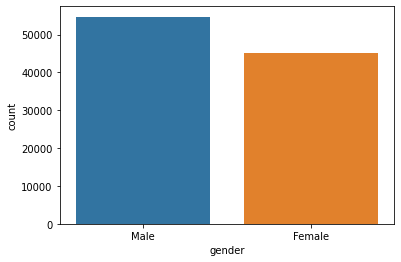

In [15]:
sns.countplot(df['gender'])
plt.show()

In [16]:
df.head(7)

,id,gender,dob,income,marital_status,city,last_purchase_date,score
0,660ba2ad-e4ba-4e56-bc36-8a2daa77dd23,Male,1977-05-19,46532,Single,Oklahoma City,2020-06-22,63
1,6da25e92-ad6a-458b-a9b9-0995e664d229,Female,2000-11-28,13734,Single,Columbus,08-04-2020,43
2,11261389-dce2-4912-bd48-e406288f2a8b,Female,1975-06-05,36282,Single,Miami,2022-08-21,882
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,27-05-1992,83451,Divorced,Colorado Springs,18-12-2020,653
4,d3024d83-cbd1-481a-8e29-a37259107dfb,Female,1987-09-13,58351,Married,New Orleans,2021-05-25,535
5,748a9099-0ff1-46c1-b87b-574ea150aed9,Female,18-08-1990,47585,Married,Las Vegas,2018-04-17,639
6,a2c8d5b7-1ec2-49a9-88ee-07a9edd936ef,Female,1980-02-02,59336,Married,Kansas City,05-06-2010,974


In [17]:
#default_date = pd.to_datetime('')
#df['dob'].fillna(default_date, inplace=True)

In [18]:
# Create a new column named age that contains the age of each customer based on their dob
df['dob'] = pd.to_datetime(df['dob'], format='%d-%m-%Y', errors='coerce')

df['age'] = (pd.to_datetime('now') - df['dob']).astype('<m8[Y]')

In [19]:
#df['age']
df.dropna(subset=['dob'], inplace=True)


In [20]:
#print(df['dob'].isna().sum())


In [21]:
df.head(7)

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30.0
5,748a9099-0ff1-46c1-b87b-574ea150aed9,Female,1990-08-18,47585,Married,Las Vegas,2018-04-17,639,32.0
9,a4739371-a97a-4436-a8c0-8365c4c7b148,Male,1999-04-18,15196,Divorced,San Antonio,2015-01-17,447,23.0
10,bafbbfc4-0758-4fe9-91bb-7812f2aeafc9,Male,1984-01-14,80519,Married,Phoenix,2015-03-20,843,39.0
11,8920429a-ab26-4a51-b6d9-a2c46736cd0c,Female,1972-07-24,62060,Divorced,Atlanta,2019-04-23,238,50.0
13,0afff259-aeb1-45be-8999-76ebf486a852,Male,1982-11-17,92235,Married,Philadelphia,21-08-2011,1,40.0
15,3ca07a1d-ac90-41be-9b17-67e1a959e1e4,Female,1982-12-11,82691,Married,Miami,21-12-2014,44,40.0


In [22]:
df.tail(7)

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age
772861,4ac3b97a-1111-4d80-9265-77b23d801c9f,Female,1982-01-28,38780,Married,Columbus,09-06-2011,322,41.0
776513,c545c90f-2ae6-4f32-9ed3-f91ecd3c79f1,Male,1978-03-04,71123,Widowed,El Paso,2020-09-03,198,45.0
787308,d8cac0dc-6fbe-47f7-9d43-e536cf4e183d,Male,1978-04-08,58206,Widowed,Denver,13-04-2015,925,44.0
790824,948606d1-e20e-4f9a-b945-2f010bdc3dca,Male,2000-11-21,90608,Single,Dallas,2019-01-03,674,22.0
828477,d842a7bc-8473-4d61-ba24-481a215d25d3,Female,1982-07-04,89966,Widowed,Tucson,23-09-2016,794,40.0
836322,7e61831a-f0a0-40eb-b685-1103587f7bb4,Male,2000-09-06,52596,Widowed,Sacramento,2013-04-25,495,22.0
903223,59e2af4b-f282-4998-97f5-1bb70542633d,Female,1979-04-05,97057,Divorced,Tucson,04-01-2016,579,43.0


In [23]:
# Create a new column named income_group that categorizes customers into three groups based on their income values: "Low", "Medium", "High" based on each 33% percentile
quantiles = df['income'].quantile([0, 0.33, 0.67, 1])
labels = ['Low', 'Medium', 'High']
# pd.cut() is used to create the groups, where 'quantiles' is a list or array of quantiles that define the labels,
df['income_group'] = pd.cut(df['income'], quantiles, labels=labels)


In [24]:

# Create a new column named score_group that categorizes customers into three groups based on their score values: "Poor", "Fair", and "Good" based on each 33% percentile
quantiles = df['score'].quantile([0, 0.33, 0.67, 1])
labels = ['Poor', 'Fair', 'Good']
df['score_group'] = pd.cut(df['score'], quantiles, labels=labels)

In [25]:
df.dropna(subset=['score_group'], inplace=True)


In [26]:
df.head(7)

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,18-12-2020,653,30.0,High,Fair
5,748a9099-0ff1-46c1-b87b-574ea150aed9,Female,1990-08-18,47585,Married,Las Vegas,2018-04-17,639,32.0,Medium,Fair
9,a4739371-a97a-4436-a8c0-8365c4c7b148,Male,1999-04-18,15196,Divorced,San Antonio,2015-01-17,447,23.0,Low,Fair
10,bafbbfc4-0758-4fe9-91bb-7812f2aeafc9,Male,1984-01-14,80519,Married,Phoenix,2015-03-20,843,39.0,High,Good
11,8920429a-ab26-4a51-b6d9-a2c46736cd0c,Female,1972-07-24,62060,Divorced,Atlanta,2019-04-23,238,50.0,Medium,Poor
15,3ca07a1d-ac90-41be-9b17-67e1a959e1e4,Female,1982-12-11,82691,Married,Miami,21-12-2014,44,40.0,High,Poor
16,9a45eaf0-6c17-491e-952e-56d0106fc591,Male,1974-12-04,8707,Married,Austin,06-03-2017,610,48.0,Low,Fair


In [27]:
# Remove any rows where the last_purchase_date is before the year 2019
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'], format='%d-%m-%Y', errors='coerce')
df = df[df['last_purchase_date'].dt.year >= 2019]



In [28]:
df.head(7)

,id,gender,dob,income,marital_status,city,last_purchase_date,score,age,income_group,score_group
3,c9f67b5a-fcbf-4da0-bf31-c8d2492013ca,Male,1992-05-27,83451,Divorced,Colorado Springs,2020-12-18,653,30.0,High,Fair
38,bf1be0c5-a36a-4c4f-a2a2-f011976aaf0a,Male,1976-06-10,7285,Married,Memphis,2019-06-06,397,46.0,Low,Fair
48,9313fd9c-8996-41f1-8bcd-45a8832dc3f3,Female,1983-10-09,96741,Divorced,Baltimore,2019-10-10,502,39.0,High,Fair
54,4756e514-ddcc-4ffe-b9e4-71ee9e52d70e,Male,1983-12-15,92929,Widowed,Austin,2021-01-15,39,39.0,High,Poor
55,221bf9e5-3d7b-43b0-96c9-d6888646975a,Male,1998-08-13,10639,Married,Mesa,2022-10-17,119,24.0,Low,Poor
74,fe743a03-8aba-4b1c-aa91-f3121a4ba7c0,Female,1978-04-18,72194,Single,Nashville,2022-03-24,331,44.0,High,Poor
110,27074c52-d1a9-43a5-8866-f0604274fae2,Male,1991-05-20,22500,Married,El Paso,2019-11-24,267,31.0,Low,Poor


In [29]:
#df.shape

In [30]:
# Save the cleaned data to a new CSV file named clean_data.csv
df.to_csv('clean_data.csv', index=False)

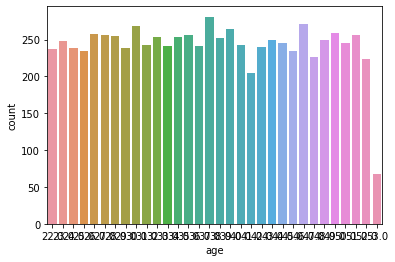

In [31]:
sns.countplot(df['age'])
plt.show()

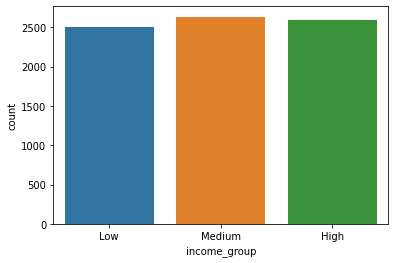

In [32]:
sns.countplot(df['income_group'])
plt.show()

In [33]:
# get the correlation
#df.describe()

In [34]:
# get the correlation
#df.corr()